### Step 1 - Data Engineering

In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# The climate data for Hawaii is provided through two CSV files. Start by using Python 
# and Pandas to inspect the content of these files and clean the data.

hm = pd.read_csv('Resources/hawaii_measurements.csv')
hs = pd.read_csv('Resources/hawaii_stations.csv')

In [5]:
hm.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [6]:
hs

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [7]:
hm_clean = hm.dropna()

In [8]:
hm_clean.count()

station    18103
date       18103
prcp       18103
tobs       18103
dtype: int64

In [9]:
hm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18103 entries, 0 to 19549
Data columns (total 4 columns):
station    18103 non-null object
date       18103 non-null object
prcp       18103 non-null float64
tobs       18103 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 707.1+ KB


In [10]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), object(2)
memory usage: 440.0+ bytes


### Step 2 - Database Engineering  (Reflect Tables into SQLAlchemy ORM)

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [12]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [13]:
hs.columns

Index(['station', 'name', 'latitude', 'longitude', 'elevation'], dtype='object')

In [14]:
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

In [15]:
# Sets an object to utilize the default declarative base in SQL Alchemy
Base = declarative_base()


# Creates Classes which will serve as the anchor points for our Tables
class Station(Base):
    __tablename__ = 'stations'
    station = Column(String(255), primary_key=True)
    name = Column(String(255))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
class Measurement(Base):
    __tablename__ = 'measurements'
    station = Column(String(255), primary_key=True)
    date = Column(String(255))
    prcp = Column(Float) 
    tobs = Column(Float)

In [16]:
Base.metadata.create_all(engine)

In [17]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [18]:
hs.to_sql("stations", conn, index=False, if_exists='replace')

In [19]:
hm_clean.to_sql("measurements", conn, index=False, if_exists='replace')

### Step 3 - Climate Analysis and Exploration

In [20]:
# select station, name from stations;
results = session.query(Station.station, Station.name)

stations = []
names = []
for station, name in results:
    stations.append(station)
    names.append(name)

In [21]:
names

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [22]:
from sqlalchemy import func

In [23]:
results = session.query(func.max(Station.latitude)).all()
for result in results:
    print(result)

(21.5213,)


In [24]:
results = session.query(Station.name).limit(5)
for result in results:
    print(result)

('WAIKIKI 717.2, HI US',)
('KANEOHE 838.1, HI US',)
('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
('PEARL CITY, HI US',)
('UPPER WAHIAWA 874.3, HI US',)


In [25]:
results = session.query(func.count(Station.station)).all()
for result in results:
    print(result)

(9,)


In [26]:
engine.execute("SELECT * FROM stations").fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [27]:
hm_clean.columns

Index(['station', 'date', 'prcp', 'tobs'], dtype='object')

In [28]:
import datetime as dt

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for row in results:
    print(f"The most recent date recorded is {row}.")

The most recent date recorded is 2017-08-23.


In [32]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"Going back one year, the date was {query_date}.")

Going back one year, the date was 2016-08-23.


In [33]:
# perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))

dates = []
rain = []
for date, prcp in results:
    dates.append(date)
    rain.append(prcp)

df = pd.DataFrame({"dates": dates,
                   "Prcp": rain
    
})

In [34]:
# Sort the dataframe by date
new = df.sort_values("dates")
new.reset_index()


,index,Prcp,dates
0,0,0.00,2016-08-23
1,1027,0.02,2016-08-23
2,702,0.05,2016-08-23
3,1693,0.70,2016-08-23
4,359,0.15,2016-08-23
5,1341,1.79,2016-08-23
6,1028,1.22,2016-08-24
7,1,0.08,2016-08-24
8,1342,2.15,2016-08-24
9,360,2.15,2016-08-24


<IPython.core.display.Javascript object>


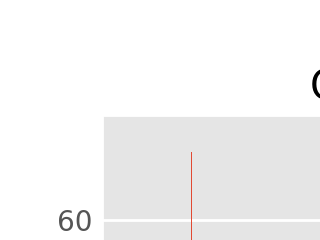

In [54]:
#set date as index
# new.set_index("dates", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(new.index, new["Prcp"])
# new.plot(ax=ax)


# Rotate the xticks for the dates
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


ax.set_title('Rain Fall per Day, Aug 2016-2017')
ax.set_xlabel('Dates')
ax.set_ylabel('Rain')

plt.show()
plt.savefig('Rain.png')

In [35]:
# Calculate the date 1 year ago from today
print("Today's Date is:", dt.date.today())
query_date = dt.date.today() - dt.timedelta(days=365)
print("One year ago today is:", query_date)


Today's Date is: 2018-07-06
One year ago today is: 2017-07-06


In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [38]:
# Design a query to calculate the total number of stations.
results = session.query(Station.station, Station.name).count()
print(f"There are {results} stations.")

There are 9 stations.


In [39]:
engine.execute("SELECT * FROM measurements limit 5").fetchall()

[('USC00519397', '2010-01-01', 0.08, 65),
 ('USC00519397', '2010-01-02', 0.0, 63),
 ('USC00519397', '2010-01-03', 0.0, 74),
 ('USC00519397', '2010-01-04', 0.0, 76),
 ('USC00519397', '2010-01-07', 0.06, 70)]

In [40]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order

results = session.query(Measurement.station, func.count(Measurement.station))\
            .group_by(Measurement.station)\
            .order_by(desc(func.count(Measurement.station)))

# test = engine.execute("SELECT count(station), station FROM measurements group by station ORDER BY COUNT(station) Desc")
for row in results:
    print(row[0], row[1])

USC00519281 2772
USC00513117 2696
USC00519397 2685
USC00519523 2572
USC00516128 2484
USC00514830 1937
USC00511918 1932
USC00517948 683
USC00518838 342


In [41]:
# Which station has the highest number of observations?
results = session.query(func.max(Measurement.station))\
            .group_by(Measurement.station)\
            .order_by(desc(func.count(Measurement.station)))\
            .limit(1)
    
for row in results:
    print(f"{row[0]} had the highest number of observations.")
    

USC00519281 had the highest number of observations.


In [42]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

results = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
            .filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))\
            .order_by(Measurement.date)\
#             .limit(5)

for row in results:
    print(row[0], row[1], row[2])

USC00519397 2016-08-23 81
USC00513117 2016-08-23 76
USC00514830 2016-08-23 80
USC00519523 2016-08-23 80
USC00519281 2016-08-23 77
USC00516128 2016-08-23 74
USC00519397 2016-08-24 79
USC00513117 2016-08-24 76
USC00514830 2016-08-24 80
USC00519523 2016-08-24 79
USC00519281 2016-08-24 77
USC00516128 2016-08-24 74
USC00519397 2016-08-25 80
USC00513117 2016-08-25 77
USC00514830 2016-08-25 81
USC00517948 2016-08-25 81
USC00519523 2016-08-25 80
USC00519281 2016-08-25 80
USC00516128 2016-08-25 77
USC00519397 2016-08-26 79
USC00513117 2016-08-26 78
USC00514830 2016-08-26 81
USC00517948 2016-08-26 81
USC00519523 2016-08-26 84
USC00519281 2016-08-26 80
USC00519397 2016-08-27 77
USC00513117 2016-08-27 73
USC00514830 2016-08-27 81
USC00519523 2016-08-27 81
USC00519281 2016-08-27 75
USC00519397 2016-08-28 78
USC00513117 2016-08-28 73
USC00514830 2016-08-28 81
USC00519523 2016-08-28 80
USC00519281 2016-08-28 73
USC00516128 2016-08-28 71
USC00519397 2016-08-29 78
USC00513117 2016-08-29 78
USC00514830 

USC00519281 2016-11-12 74
USC00516128 2016-11-12 73
USC00519397 2016-11-13 72
USC00513117 2016-11-13 72
USC00514830 2016-11-13 78
USC00519523 2016-11-13 79
USC00519281 2016-11-13 77
USC00516128 2016-11-13 72
USC00519397 2016-11-14 77
USC00513117 2016-11-14 76
USC00514830 2016-11-14 79
USC00517948 2016-11-14 79
USC00519523 2016-11-14 78
USC00519281 2016-11-14 76
USC00516128 2016-11-14 74
USC00519397 2016-11-15 77
USC00513117 2016-11-15 78
USC00514830 2016-11-15 77
USC00519523 2016-11-15 77
USC00519281 2016-11-15 76
USC00516128 2016-11-15 72
USC00519397 2016-11-16 77
USC00513117 2016-11-16 76
USC00514830 2016-11-16 78
USC00519523 2016-11-16 77
USC00519281 2016-11-16 75
USC00516128 2016-11-16 72
USC00519397 2016-11-17 77
USC00513117 2016-11-17 75
USC00514830 2016-11-17 77
USC00519523 2016-11-17 77
USC00519281 2016-11-17 76
USC00516128 2016-11-17 75
USC00519397 2016-11-18 77
USC00513117 2016-11-18 78
USC00519523 2016-11-18 77
USC00519281 2016-11-18 75
USC00519397 2016-11-19 75
USC00513117 

USC00519281 2017-01-10 62
USC00516128 2017-01-10 64
USC00519397 2017-01-11 78
USC00513117 2017-01-11 66
USC00514830 2017-01-11 76
USC00519281 2017-01-11 63
USC00516128 2017-01-11 66
USC00519397 2017-01-12 67
USC00513117 2017-01-12 67
USC00519281 2017-01-12 65
USC00516128 2017-01-12 68
USC00519397 2017-01-13 67
USC00513117 2017-01-13 70
USC00519281 2017-01-13 69
USC00516128 2017-01-13 67
USC00519397 2017-01-14 65
USC00513117 2017-01-14 66
USC00514830 2017-01-14 77
USC00519281 2017-01-14 77
USC00516128 2017-01-14 70
USC00519397 2017-01-15 66
USC00513117 2017-01-15 67
USC00519281 2017-01-15 70
USC00516128 2017-01-15 68
USC00519397 2017-01-16 67
USC00513117 2017-01-16 69
USC00519523 2017-01-16 80
USC00519281 2017-01-16 74
USC00516128 2017-01-16 68
USC00519397 2017-01-17 66
USC00513117 2017-01-17 74
USC00514830 2017-01-17 75
USC00517948 2017-01-17 70
USC00519281 2017-01-17 69
USC00516128 2017-01-17 69
USC00519397 2017-01-18 72
USC00513117 2017-01-18 73
USC00514830 2017-01-18 75
USC00517948 

USC00513117 2017-03-11 68
USC00519523 2017-03-11 81
USC00519281 2017-03-11 81
USC00516128 2017-03-11 82
USC00519397 2017-03-12 74
USC00513117 2017-03-12 70
USC00519523 2017-03-12 74
USC00519281 2017-03-12 69
USC00519397 2017-03-13 71
USC00513117 2017-03-13 70
USC00514830 2017-03-13 77
USC00519523 2017-03-13 69
USC00519281 2017-03-13 66
USC00519397 2017-03-14 71
USC00513117 2017-03-14 70
USC00514830 2017-03-14 77
USC00517948 2017-03-14 73
USC00519523 2017-03-14 74
USC00519281 2017-03-14 67
USC00516128 2017-03-14 75
USC00519397 2017-03-15 71
USC00513117 2017-03-15 71
USC00517948 2017-03-15 75
USC00519523 2017-03-15 71
USC00519281 2017-03-15 69
USC00516128 2017-03-15 76
USC00519397 2017-03-16 70
USC00513117 2017-03-16 69
USC00519523 2017-03-16 69
USC00519281 2017-03-16 66
USC00516128 2017-03-16 77
USC00519397 2017-03-17 72
USC00513117 2017-03-17 69
USC00514830 2017-03-17 72
USC00519523 2017-03-17 70
USC00519281 2017-03-17 68
USC00519397 2017-03-18 69
USC00513117 2017-03-18 67
USC00514830 

USC00516128 2017-05-09 72
USC00519397 2017-05-10 78
USC00513117 2017-05-10 75
USC00514830 2017-05-10 76
USC00519523 2017-05-10 76
USC00519281 2017-05-10 74
USC00516128 2017-05-10 72
USC00519397 2017-05-11 78
USC00513117 2017-05-11 74
USC00519523 2017-05-11 78
USC00519281 2017-05-11 70
USC00516128 2017-05-11 78
USC00519397 2017-05-12 79
USC00513117 2017-05-12 74
USC00519523 2017-05-12 77
USC00519281 2017-05-12 75
USC00516128 2017-05-12 70
USC00519397 2017-05-13 79
USC00513117 2017-05-13 75
USC00519523 2017-05-13 76
USC00519281 2017-05-13 76
USC00516128 2017-05-13 71
USC00519397 2017-05-14 77
USC00513117 2017-05-14 75
USC00519523 2017-05-14 78
USC00519281 2017-05-14 77
USC00516128 2017-05-14 70
USC00519397 2017-05-15 78
USC00513117 2017-05-15 75
USC00519523 2017-05-15 77
USC00519281 2017-05-15 74
USC00516128 2017-05-15 72
USC00519397 2017-05-16 78
USC00513117 2017-05-16 75
USC00514830 2017-05-16 77
USC00519523 2017-05-16 76
USC00519281 2017-05-16 74
USC00516128 2017-05-16 71
USC00519397 

USC00514830 2017-07-10 80
USC00519523 2017-07-10 82
USC00519281 2017-07-10 69
USC00516128 2017-07-10 77
USC00519397 2017-07-11 78
USC00513117 2017-07-11 76
USC00514830 2017-07-11 79
USC00519523 2017-07-11 79
USC00519281 2017-07-11 72
USC00516128 2017-07-11 74
USC00519397 2017-07-12 81
USC00513117 2017-07-12 78
USC00514830 2017-07-12 81
USC00519523 2017-07-12 82
USC00519281 2017-07-12 74
USC00516128 2017-07-12 72
USC00519397 2017-07-13 79
USC00513117 2017-07-13 76
USC00514830 2017-07-13 81
USC00519523 2017-07-13 79
USC00519281 2017-07-13 74
USC00516128 2017-07-13 77
USC00519397 2017-07-14 81
USC00513117 2017-07-14 80
USC00514830 2017-07-14 80
USC00519523 2017-07-14 80
USC00519281 2017-07-14 76
USC00516128 2017-07-14 76
USC00519397 2017-07-15 80
USC00513117 2017-07-15 79
USC00514830 2017-07-15 82
USC00519523 2017-07-15 82
USC00519281 2017-07-15 80
USC00516128 2017-07-15 78
USC00519397 2017-07-16 78
USC00513117 2017-07-16 76
USC00514830 2017-07-16 79
USC00519523 2017-07-16 82
USC00519281 

In [45]:
# Filter by the station with the highest number of observations.

results = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
            .filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))\
            .filter(Measurement.station=='USC00519281')\
            .order_by(desc(Measurement.date))\
            
            
dates = []
station_tobs = []
for station, date, tobs in results:
    station_tobs.append(tobs)
    dates.append(date)

df2 = pd.DataFrame({"dates": dates,
                   "Observable Temp": station_tobs
    
})

In [46]:
# What is the max observed temp
results = session.query(func.max(Measurement.tobs))\
            .filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))\
            .filter(Measurement.station=='USC00519281')\
            .order_by(desc(Measurement.date))\
            

for row in results:
    print(f"Max obs temp for USC00519281 is {row[0]}.")

Max obs temp for USC00519281 is 83.


In [47]:
# What is the min observed temp
results = session.query(func.min(Measurement.tobs))\
            .filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))\
            .filter(Measurement.station=='USC00519281')\
            .order_by(desc(Measurement.date))\
            

for row in results:
    print(f"Min obs temp for USC00519281 is {row[0]}.")

Min obs temp for USC00519281 is 59.


In [48]:
# What is the avg observed temp
results = session.query(func.avg(Measurement.tobs))\
            .filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))\
            .filter(Measurement.station=='USC00519281')\
            .order_by(desc(Measurement.date))\
            

for row in results:
    print(f"Avg obs temp for USC00519281 is {row[0]:.2f}.")

Avg obs temp for USC00519281 is 73.11.


In [49]:
df2.head()

,Observable Temp,dates
0,79,2017-08-18
1,76,2017-08-17
2,76,2017-08-16
3,77,2017-08-15
4,77,2017-08-14


In [50]:
# Plot the results as a histogram with bins=12.
bins = [0, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 100]

# Create the names for the four bins
group_names = ['Less than 60', '60-61', '62-63', '64-65', '66-67', '68-69', '70-71', '72-73', 
               '74-75', '76-77', '78-79', '80 and up']


graph = pd.cut(df2["Observable Temp"], bins, labels=group_names)
ax = graph.value_counts().plot.bar(rot=0, color="b")
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in graph.cat.categories])
plt.show()


In [55]:
purchase_plot = df2["Observable Temp"].hist(bins=12)
purchase_plot.set_title("Observable Temperature in Hawaii")
purchase_plot.set_xlabel("Temperature)")
purchase_plot.set_ylabel("Frequency")

plt.savefig('Obs_Temp.png')
plt.show()